<div>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Darwin Martinez
<br>
<i><b>Asignatura:</b></i> Procesamiento de imágenes.
<br>
<i><b>Estudiante:</b></i> Laura Gomez
<br>
<br> Agosto/2023
<br>
</FONT>
</div>

In [ ]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import seaborn as sns
import cv2
import numpy as np

In [ ]:
# Clone the repository
try:
  !rm -r *
  !git clone https://github.com/ALEJO28042001/Test_Images.git
except FileExistsError:
  print("Repository already clone")

Cloning into 'Test_Images'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 719.30 KiB | 11.99 MiB/s, done.
Resolving deltas: 100% (1/1), done.


<FONT FACE="times new roman" SIZE=5>

#1. Abrir la imagen y dejarla en escala de grises en un solo canal:

In [ ]:
#ruta1 = "https://www.mexicoescultura.com/galerias/actividades/principal/totoroo_1.jpg"

In [ ]:
ruta1 = "https://www.laespanolaaceites.com/wp-content/uploads/2019/06/pizza-con-chorizo-jamon-y-queso-1080x671.jpg"

In [ ]:
#ruta2 = "https://phantom-marca-mx.unidadeditorial.es/c708d3f32aaab50aa7790eae59c8fd2d/resize/828/f/jpg/mx/assets/multimedia/imagenes/2023/05/21/16846238697919.jpg"

In [ ]:
ruta2 = "https://thesweetmolcajete.com/wp-content/uploads/2020/06/WPRM-Receta-de-Pastel-de-Tres-Leches.jpg"

In [ ]:
response = requests.get(ruta1)
imagenA = BytesIO(response.content)

In [ ]:
response = requests.get(ruta2)
imagenB = BytesIO(response.content)

In [ ]:
imagensita_a  = Image.open(imagenA)
imagensita_b = Image.open(imagenB)

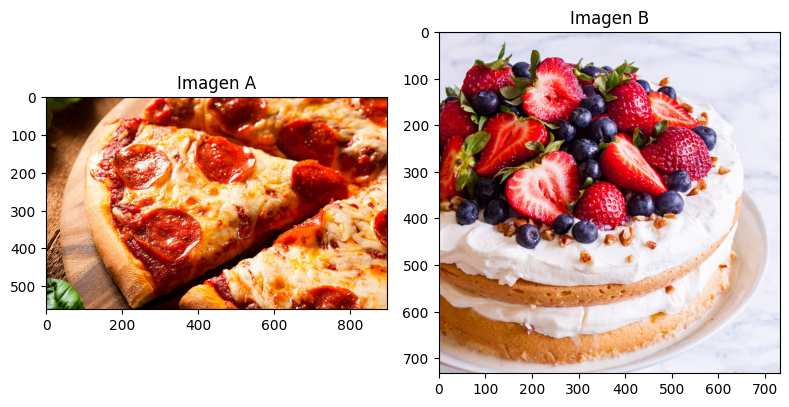

In [ ]:
#0 es rojo, 1 es verde, 2 es azul
fig, axs = plt.subplots(1, 2, figsize=(8, 10))
axs[0].imshow(imagensita_a)
axs[0].set_title('Imagen A')
axs[1].imshow(imagensita_b)
axs[1].set_title('Imagen B')

plt.tight_layout()
plt.show()

<FONT FACE="times new roman" SIZE=5>

#2. Realizar una expansión de contraste:

In [ ]:
canales = ["R", "G", "B"]

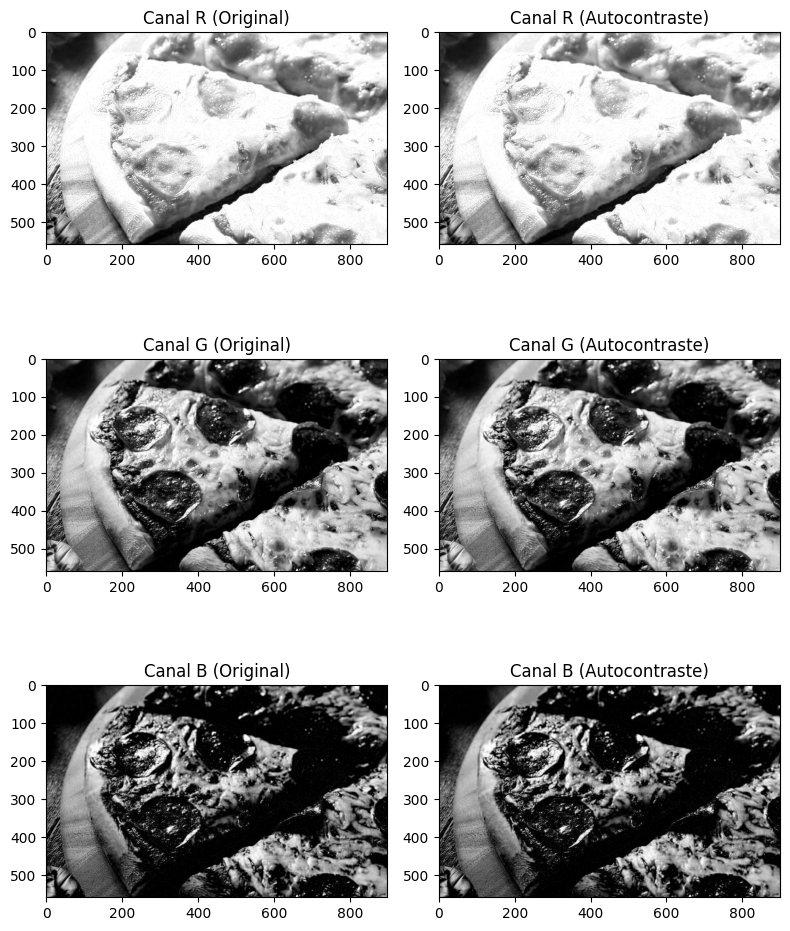

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(8, 10))

for i, canal in enumerate(canales):
  axs[i, 0].imshow(imagensita_a.getchannel(canal), cmap='gray')
  axs[i, 0].set_title(f"Canal {canal} (Original)")

  canal_imagen = imagensita_a.getchannel(canal)
  canal_imagen_array = np.array(canal_imagen)
  canal_imagen_pil = Image.fromarray(canal_imagen_array)
  canal_imagen_pil = ImageOps.autocontrast(canal_imagen_pil,  cutoff=50)
  axs[i,1].imshow(canal_imagen_pil, cmap='gray')
  axs[i,1].set_title(f"Canal {canal} (Autocontraste)")

plt.tight_layout()
plt.show()

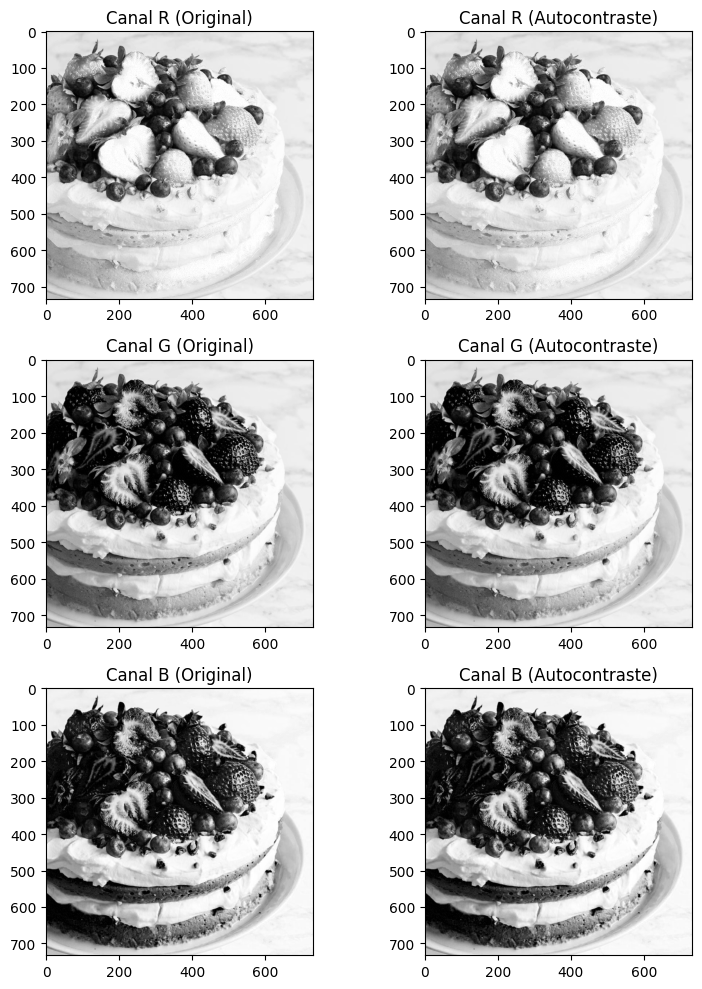

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(8, 10))

for i, canal in enumerate(canales):
  axs[i,0].imshow(imagensita_b.getchannel(canal), cmap='gray')
  axs[i,0].set_title(f"Canal {canal} (Original)")

  canal_imagen = imagensita_b.getchannel(canal)
  canal_imagen_array = np.array(canal_imagen)
  canal_imagen_pil = Image.fromarray(canal_imagen_array)
  canal_imagen_pil = ImageOps.autocontrast(canal_imagen_pil)
  axs[i,1].imshow(canal_imagen_pil, cmap='gray')
  axs[i,1].set_title(f"Canal {canal} (Autocontraste)")

plt.tight_layout()
plt.show()

<FONT FACE="times new roman" SIZE=5>

#3. Hacer una ecualización del histograma:

In [ ]:
imagensita_a2  = np.array(Image.open(imagenA))
imagensita_b2 = np.array(Image.open(imagenB))
canales = [0,1,2]

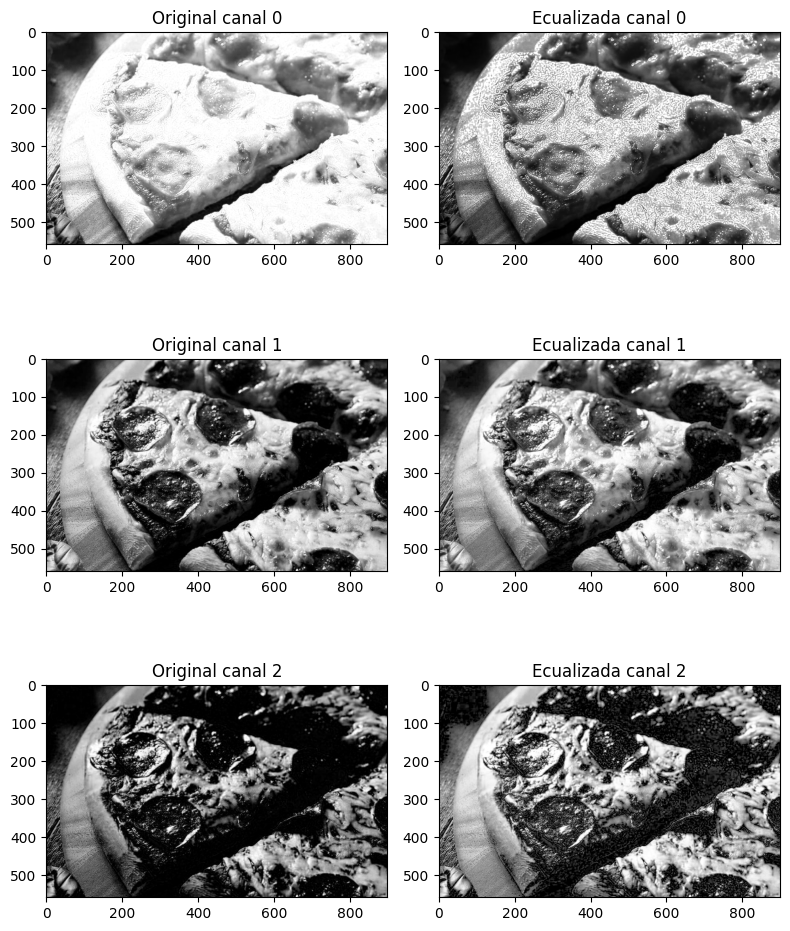

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(8, 10))

for i, canal in enumerate(canales):
  canal_imagen = imagensita_a2[:,:,canal]
  axs[i,0].imshow(canal_imagen, cmap='gray')
  axs[i,0].set_title(f"Original canal {canal}")

  canal_imagen_eq = cv2.equalizeHist(canal_imagen)
  axs[i,1].imshow(canal_imagen_eq, cmap='gray')
  axs[i,1].set_title(f"Ecualizada canal {canal}")

plt.tight_layout()
plt.show()

In [ ]:
  # Mostrar histograma del canal original
    #tambien podemos usar canal_imagen.ravel para aplanar la matriz y graficarla
    #axs[1, i + 1].hist(canal_imagen.ravel(), bins=256, color='red', alpha=0.7)
    #la diferencia es que flatten nos da una copia aplanada y ravel la original

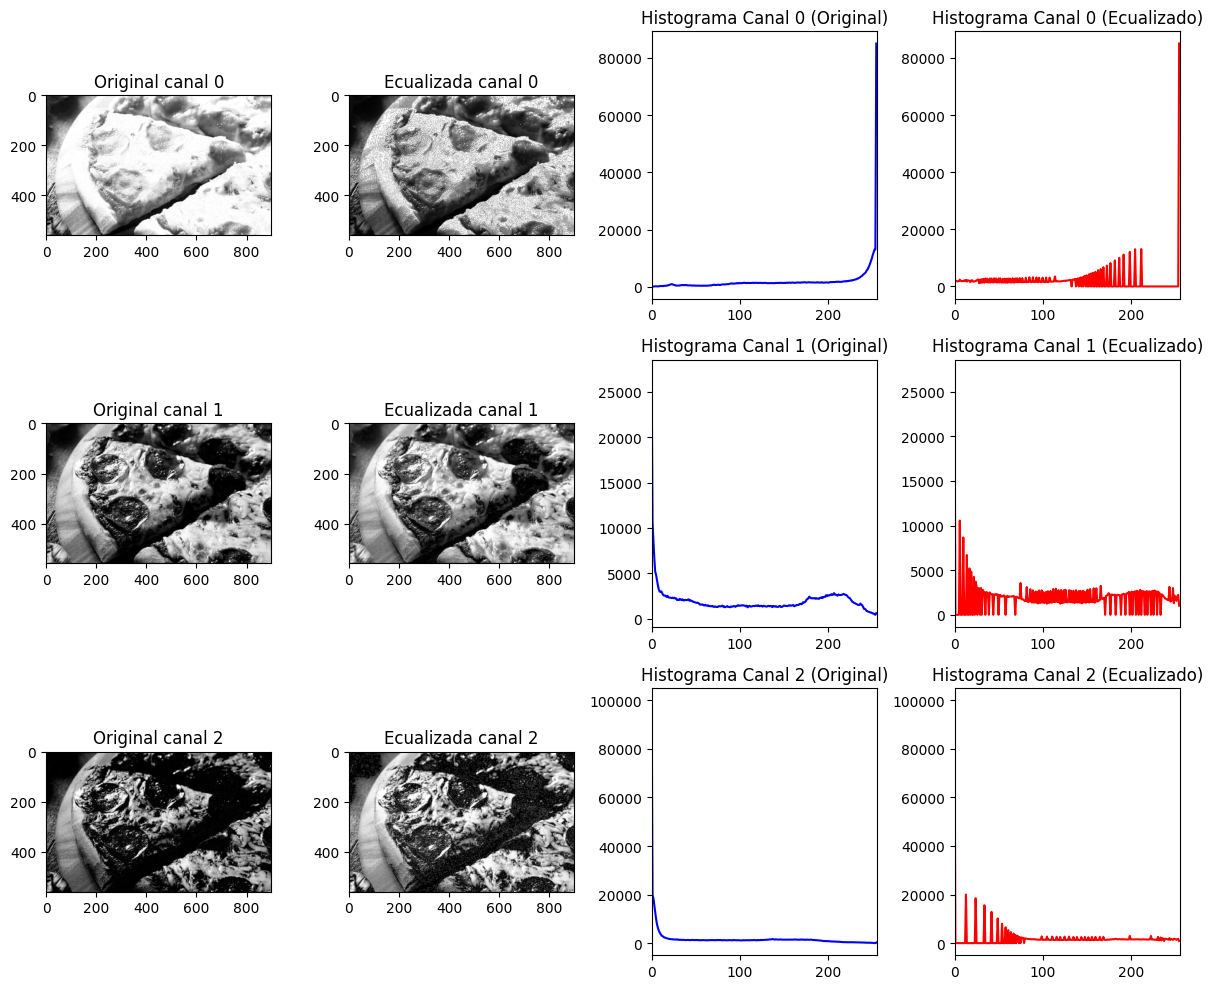

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(12, 10))

for i, canal in enumerate(canales):
    canal_imagen = imagensita_a2[:,:,canal]
    axs[i,0].imshow(canal_imagen, cmap='gray')
    axs[i,0].set_title(f"Original canal {canal}")

    canal_imagen_eq = cv2.equalizeHist(canal_imagen)
    axs[i,1].imshow(canal_imagen_eq, cmap='gray')
    axs[i,1].set_title(f"Ecualizada canal {canal}")

    hist_original, bins_original = np.histogram(canal_imagen.ravel(), bins=256, range=(0, 256))
    axs[i,2].plot(hist_original, color='blue')
    axs[i,2].set_xlim([0, 256])
    axs[i,2].set_title(f"Histograma Canal {canal} (Original)")

    hist_ecualizado, bins_ecualizado = np.histogram(canal_imagen_eq.ravel(), bins=256, range=(0, 256))
    axs[i,3].plot(hist_ecualizado, color='red')
    axs[i,3].set_xlim([0, 256])
    axs[i,3].set_title(f"Histograma Canal {canal} (Ecualizado)")

plt.tight_layout()
plt.show()


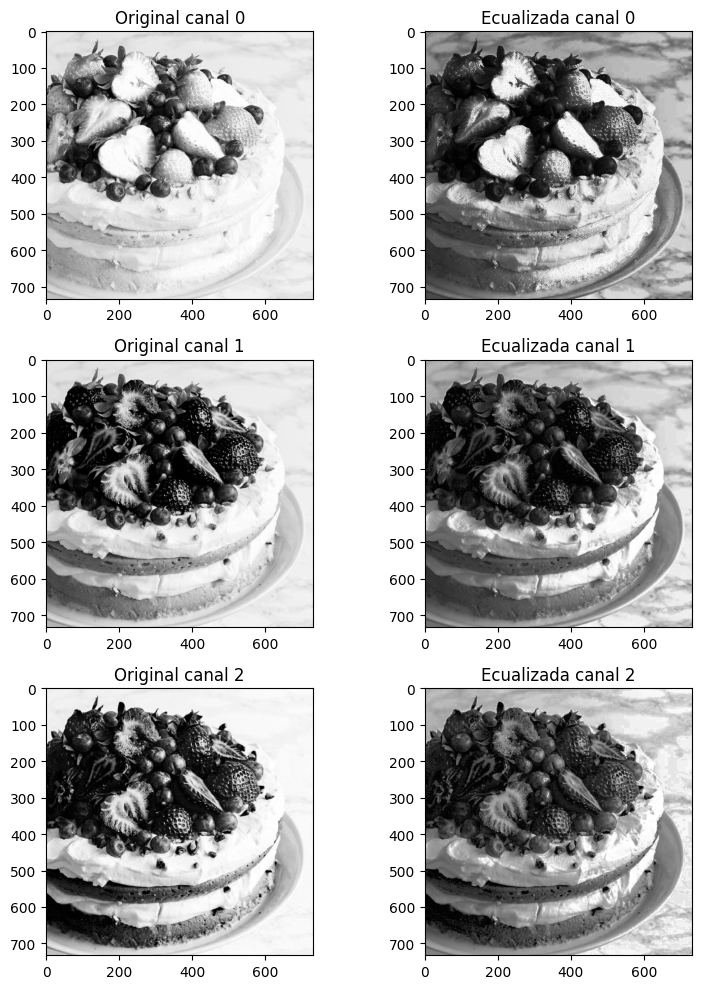

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(8, 10))

for i, canal in enumerate(canales):
  canal_imagen = imagensita_b2[:,:,canal]
  axs[i,0].imshow(canal_imagen, cmap='gray')
  axs[i,0].set_title(f"Original canal {canal}")

  canal_imagen_eq = cv2.equalizeHist(canal_imagen)
  axs[i,1].imshow(canal_imagen_eq, cmap='gray')
  axs[i,1].set_title(f"Ecualizada canal {canal}")

plt.tight_layout()
plt.show()

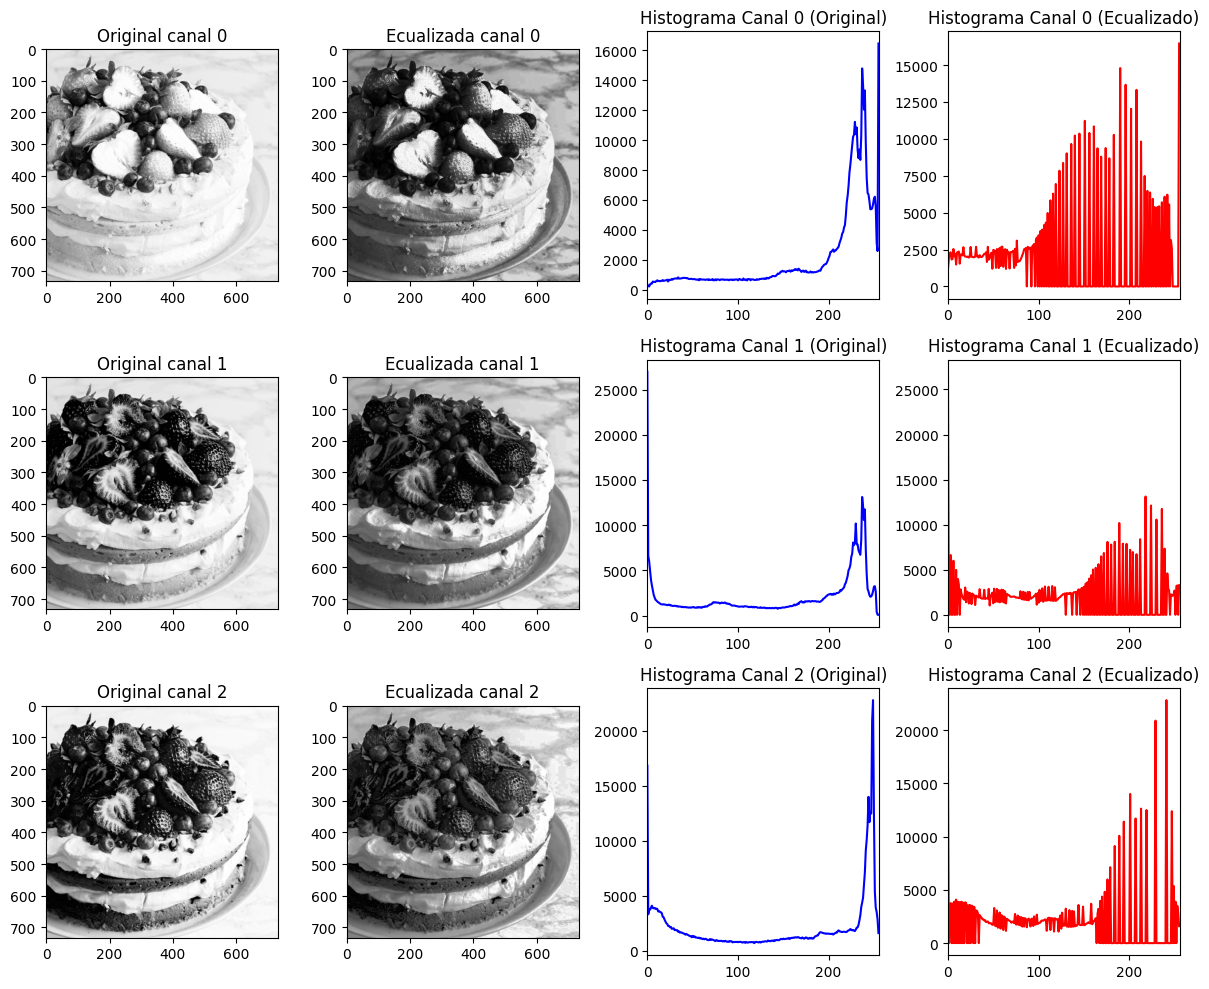

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(12, 10))

for i, canal in enumerate(canales):
    canal_imagen = imagensita_b2[:,:,canal]
    axs[i,0].imshow(canal_imagen, cmap='gray')
    axs[i,0].set_title(f"Original canal {canal}")

    canal_imagen_eq = cv2.equalizeHist(canal_imagen)
    axs[i,1].imshow(canal_imagen_eq, cmap='gray')
    axs[i,1].set_title(f"Ecualizada canal {canal}")

    hist_original, bins_original = np.histogram(canal_imagen.ravel(), bins=256, range=(0, 256))
    axs[i,2].plot(hist_original, color='blue')
    axs[i,2].set_xlim([0, 256])
    axs[i,2].set_title(f"Histograma Canal {canal} (Original)")

    hist_ecualizado, bins_ecualizado = np.histogram(canal_imagen_eq.ravel(), bins=256, range=(0, 256))
    axs[i,3].plot(hist_ecualizado, color='red')
    axs[i,3].set_xlim([0, 256])
    axs[i,3].set_title(f"Histograma Canal {canal} (Ecualizado)")

plt.tight_layout()
plt.show()


<FONT FACE="times new roman" SIZE=5>

#4. Escribir un texto acerca de las similitudes y diferencias en el procesamiento de imagen por expansión de contraste y ecualizació

<FONT FACE="times new roman" SIZE=5>

**Similitudes:**

**1. Mejora del Contraste:** Tanto los métodos de ajuste de contraste como la ecualización de histograma tienen el objetivo central de mejorar el contraste en las imágenes. Ambos métodos aspiran a alcanzar un equilibrio más adecuado entre los valores de píxeles, lo que resulta en imágenes más atractivas visualmente y con detalles más claros.

**2. Realce de Detalles:** Ambos enfoques tienen como meta realzar los detalles presentes en la imagen. Ya sea ampliando la diferencia entre los valores de píxeles en el método de ajuste de contraste o redistribuyendo los valores de píxeles mediante la ecualización de histograma, ambos métodos buscan destacar los rasgos únicos de la imagen.

**Diferencias:**

**1. Conservación de Distribución:**
   - **Ajuste de Contraste:** Los métodos de ajuste de contraste, como `ImageOps.autocontrast`, tienden a mantener una relación cercana con la distribución original de los valores de píxeles. Pueden recortar valores extremos, pero en general, conservan la estructura general de la imagen.
   - **Ecualización de Histograma:** La ecualización de histograma redistribuye los valores de píxeles según el histograma original, lo que puede alterar significativamente la apariencia global de la imagen y enfatizar características previamente oscurecidas.

**1. Resultados Visuales:**
   - **Ajuste de Contraste:** Los métodos de ajuste de contraste tienden a mantener una apariencia más natural y sutil. La imagen puede ganar en claridad y detalles sin cambiar drásticamente su aspecto general.
   - **Ecualización de Histograma:** La ecualización de histograma puede tener un impacto más pronunciado en la apariencia de la imagen. Puede destacar detalles antes poco perceptibles, resultando en una imagen con definición y realce notablemente mejorados.

Además, en el proceso de ecualización de histograma, el histograma original se transforma para que tenga una distribución más uniforme, lo que puede mejorar el contraste en la imagen. Áreas que originalmente tenían un contraste bajo se verán realzadas. Sin embargo, la ecualización puede llevar a la amplificación de ruido y hacer que ciertas áreas con valores similares de píxeles se vuelvan más distintas entre sí.


<FONT FACE="times new roman" SIZE=5>

# 5. Proponer una función de transformación y cual seria el objetivo de la misma

Se propone la función de transformación "Corrección gamma" con el fin de dejar de lado los valores o pixeles con baja intensidad y atenuar aquellos con alta intensidad.\
Para nuestro ejemplo en cuestión tiene el fin de evidenciar las partes afectadas de los dientes, calzas. Nos interesa encontrar cuantos dientes tienen un tratamiento previo; dejamos de lado los sanos y todo a su alrededor.

<FONT FACE="times new roman" SIZE=5>

# 6. Aplicarla sobre la imagen y pintar el histograma, describir que fue lo que paso  

In [ ]:
path='/content/Test_Images/panoramica.jpeg'
img = cv2.cvtColor(cv2.imread(path),cv2.COLOR_BGR2RGB)
img_gray_cv2=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [ ]:
def correccion_gamma(img,gamma):
  img=img / np.max(img)
  img=np.power(img, gamma)
  return  img * 255.0

In [ ]:
gamma=4
imagen_gamma = correccion_gamma(img_gray_cv2,gamma)

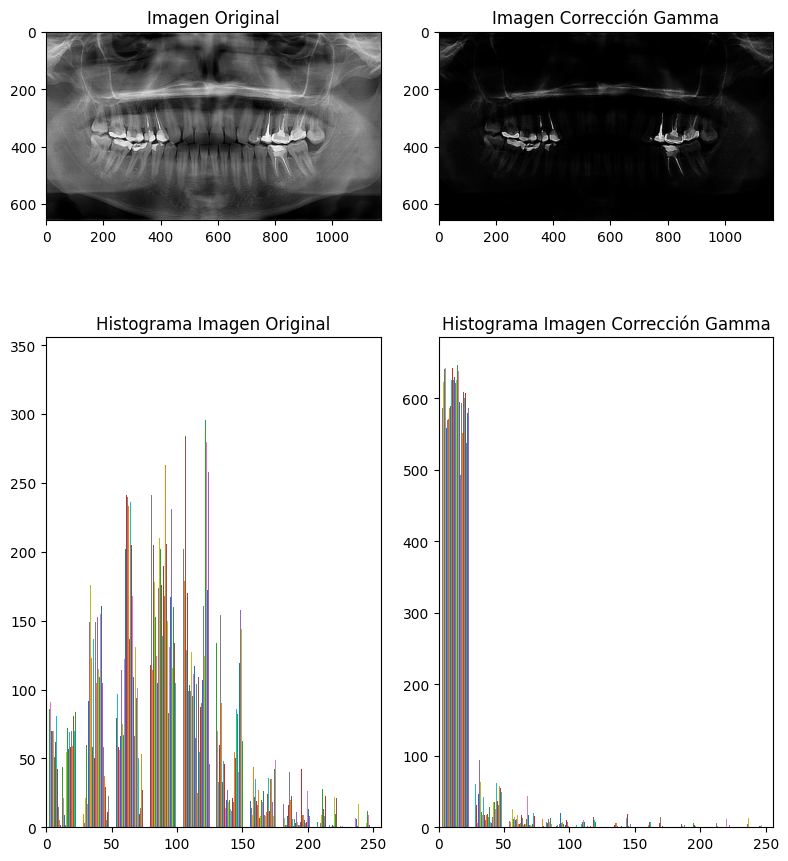

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 10))

axs[0,0].imshow(img_gray_cv2,cmap='gray')
axs[0,0].set_title('Imagen Original')

axs[0,1].imshow(imagen_gamma,cmap='gray')
axs[0,1].set_title('Imagen Corrección Gamma')

axs[1,0].hist(img_gray_cv2)
axs[1,0].set_xlim([0, 256])
axs[1,0].set_title("Histograma Imagen Original")

axs[1,1].hist(imagen_gamma)
axs[1,1].set_xlim([0, 256])
axs[1,1].set_title("Histograma Imagen Corrección Gamma")

plt.tight_layout()
plt.show()

Esta transformación unicamente nos permite ver los puntos que en la imagen original tenian un punto alto de intesidad, a los rangos medios y bajos los unifica, hace perder el detalle en los mismos.\
Para el ejemplo en cuestión, nos permitió concentrar nuestros recursos unicamente en las calzas de los dientes.